In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import re
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
Dataset = pd.read_excel("globalterrorismdb_0221dist.xlsx")

In [3]:
Dataset.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaT,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [4]:
Dataset2 = Dataset[["eventid","iday","imonth"]].copy()
Dataset2 = Dataset2[Dataset2["iday"] != 0]
Dataset2 = Dataset2[Dataset2["imonth"] != 0]
#Dataset2 = Dataset2[Dataset2["imonth"] != 2]
Dataset2["iday"] = Dataset2["iday"].astype(str).apply(lambda x: x.zfill(2))
Dataset2["imonth"] = Dataset2["imonth"].astype(str).apply(lambda x: x.zfill(2))
Dataset2["DayAndMonth"] = "2020"+"/"+Dataset2["iday"].astype(str)+"/"+Dataset2["imonth"].astype(str)

Dataset2["DayAndMonth"] = Dataset2["DayAndMonth"].apply(lambda x: datetime.strptime(x, "%Y/%d/%m"))
Dataset2 = Dataset2.sort_values(by="DayAndMonth")

In [5]:
Dataset2 = Dataset2[["eventid","DayAndMonth"]]
Dataset2.head(10)

,eventid,DayAndMonth
104786,201201010001,2020-01-01
24089,198501010006,2020-01-01
24090,198501010007,2020-01-01
24091,198501010008,2020-01-01
24092,198501010009,2020-01-01
24093,198501010010,2020-01-01
61255,199601010007,2020-01-01
61256,199601010008,2020-01-01
61257,199601010009,2020-01-01
61258,199601010010,2020-01-01


In [6]:
Dataset3 = Dataset2.groupby(Dataset2["DayAndMonth"],as_index=False).count()
Dataset3["Count"]=Dataset3["eventid"]
Dataset3 = Dataset3[["DayAndMonth","Count"]]
Dataset3[Dataset3["Count"]==Dataset3["Count"].min()]

,DayAndMonth,Count
59,2020-02-29,124


In [7]:
Dataset3.head(50)

,DayAndMonth,Count
0,2020-01-01,686
1,2020-01-02,477
2,2020-01-03,577
3,2020-01-04,578
4,2020-01-05,499
5,2020-01-06,518
6,2020-01-07,503
7,2020-01-08,572
8,2020-01-09,446
9,2020-01-10,559


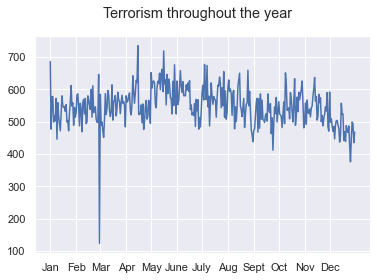

In [8]:
fig, ax = plt.subplots()
ax.plot('DayAndMonth', 'Count', data=Dataset3)
fig.suptitle("Terrorism throughout the year")
ax.set_xticks(["2020-01-01","2020-02-01","2020-03-01","2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01"])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])

plt.show()

In [9]:
fig.savefig("Figures/fig.png")

In [10]:
data2 = Dataset[["eventid","iyear"]].copy()
data2


,eventid,iyear
0,197000000001,1970
1,197000000002,1970
2,197001000001,1970
3,197001000002,1970
4,197001000003,1970
...,...,...
201178,201912310028,2019
201179,201912310030,2019
201180,201912310031,2019
201181,201912310032,2019


In [11]:
count1 = len([y for y in data2["iyear"].astype("int32") if 1970 <= y <= 1975])
count2 = len([y for y in data2["iyear"].astype("int32") if 1976 <= y <= 1980])
count3 = len([y for y in data2["iyear"].astype("int32") if 1981 <= y <= 1985])
count4 = len([y for y in data2["iyear"].astype("int32") if 1986 <= y <= 1990])
count5 = len([y for y in data2["iyear"].astype("int32") if 1991 <= y <= 1995])
count6 = len([y for y in data2["iyear"].astype("int32") if 1996 <= y <= 2000])
count7 = len([y for y in data2["iyear"].astype("int32") if 2001 <= y <= 2005])
count8 = len([y for y in data2["iyear"].astype("int32") if 2006 <= y <= 2010])
count9 = len([y for y in data2["iyear"].astype("int32") if 2011 <= y <= 2015])
count10 = len([y for y in data2["iyear"].astype("int32") if 2016 <= y <= 2019])

print(count1,count2,count3,count4,count5,count6,count7,count8,count9,count10)

3484 9091 14408 17973 16291 10409 7701 20353 57734 43739


In [12]:
data2["iyear"].astype('int32')

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
201178    2019
201179    2019
201180    2019
201181    2019
201182    2019
Name: iyear, Length: 201183, dtype: int32